# Reddit Crypto Comments - Sentiment Classification

## Data Exploration, Preprocessing & Analysis

In [1]:
import pandas as pd
import numpy as np

In [75]:
import re
import string
import json
from spacy.lang.en.stop_words import STOP_WORDS

### Loading Dataset as Pandas Dataframe

In [2]:
data_df = pd.read_csv("../data/crypto_reddit_sentiment.csv")
data_df

,worker_id,is_reviewed,review_score,Comment Text,Sentiment,Reddit URL
0,XYNN2Y4VCF3G,False,NaN,"I bought 2200 at the ico, at 0.50$ per coin. H...",Positive,https://www.reddit.com/r/Avax/comments/uzggar/...
1,DR6XNZMT9KRH,False,NaN,"Harmony one , algorand , Cardano, solana , vec...",Positive,https://www.reddit.com/r/CryptoCurrency/commen...
2,9FCQGMYD4A42,False,NaN,"Honestly, after reading this post and many of ...",Negative,https://www.reddit.com/r/CryptoCurrency/commen...
3,QEZAEMV2WF9D,False,NaN,In bear market is where money is made. I Will ...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...
4,Z7J7W3XCP4XC,False,NaN,Funny how people think Bitcoin's risk is compa...,Negative,https://www.reddit.com/r/investing/comments/um...
...,...,...,...,...,...,...
557,FM9FYY27VTVR,False,NaN,Lightning Network has the capability to do mil...,Positive,https://www.reddit.com/r/Bitcoin/comments/uzz7...
558,K94W3ATCZX2V,False,NaN,It means there will be more daily volume which...,Positive,https://www.reddit.com/r/Bitcoin/comments/v0fs...
559,W7APN9XYDRV6,False,NaN,The exchanges were so irresponsible to list th...,Negative,https://www.reddit.com/r/CryptoCurrency/commen...
560,MTCJYTYKKHZJ,False,NaN,Massive ecosystem. Pretty much all application...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...


### Renaming & Removing NA & Dropping Dups

In [3]:
data_df.rename(columns={"Comment Text": "comment_text", "Sentiment": "sentiment", "Reddit URL": "reddit_url"}, inplace=True)
data_df

,worker_id,is_reviewed,review_score,comment_text,sentiment,reddit_url
0,XYNN2Y4VCF3G,False,NaN,"I bought 2200 at the ico, at 0.50$ per coin. H...",Positive,https://www.reddit.com/r/Avax/comments/uzggar/...
1,DR6XNZMT9KRH,False,NaN,"Harmony one , algorand , Cardano, solana , vec...",Positive,https://www.reddit.com/r/CryptoCurrency/commen...
2,9FCQGMYD4A42,False,NaN,"Honestly, after reading this post and many of ...",Negative,https://www.reddit.com/r/CryptoCurrency/commen...
3,QEZAEMV2WF9D,False,NaN,In bear market is where money is made. I Will ...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...
4,Z7J7W3XCP4XC,False,NaN,Funny how people think Bitcoin's risk is compa...,Negative,https://www.reddit.com/r/investing/comments/um...
...,...,...,...,...,...,...
557,FM9FYY27VTVR,False,NaN,Lightning Network has the capability to do mil...,Positive,https://www.reddit.com/r/Bitcoin/comments/uzz7...
558,K94W3ATCZX2V,False,NaN,It means there will be more daily volume which...,Positive,https://www.reddit.com/r/Bitcoin/comments/v0fs...
559,W7APN9XYDRV6,False,NaN,The exchanges were so irresponsible to list th...,Negative,https://www.reddit.com/r/CryptoCurrency/commen...
560,MTCJYTYKKHZJ,False,NaN,Massive ecosystem. Pretty much all application...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...


In [4]:
data_df['comment_text_len'] = data_df['comment_text'].apply(lambda x: len(x))
data_df

,worker_id,is_reviewed,review_score,comment_text,sentiment,reddit_url,comment_text_len
0,XYNN2Y4VCF3G,False,NaN,"I bought 2200 at the ico, at 0.50$ per coin. H...",Positive,https://www.reddit.com/r/Avax/comments/uzggar/...,125
1,DR6XNZMT9KRH,False,NaN,"Harmony one , algorand , Cardano, solana , vec...",Positive,https://www.reddit.com/r/CryptoCurrency/commen...,135
2,9FCQGMYD4A42,False,NaN,"Honestly, after reading this post and many of ...",Negative,https://www.reddit.com/r/CryptoCurrency/commen...,323
3,QEZAEMV2WF9D,False,NaN,In bear market is where money is made. I Will ...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,86
4,Z7J7W3XCP4XC,False,NaN,Funny how people think Bitcoin's risk is compa...,Negative,https://www.reddit.com/r/investing/comments/um...,142
...,...,...,...,...,...,...,...
557,FM9FYY27VTVR,False,NaN,Lightning Network has the capability to do mil...,Positive,https://www.reddit.com/r/Bitcoin/comments/uzz7...,101
558,K94W3ATCZX2V,False,NaN,It means there will be more daily volume which...,Positive,https://www.reddit.com/r/Bitcoin/comments/v0fs...,132
559,W7APN9XYDRV6,False,NaN,The exchanges were so irresponsible to list th...,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,92
560,MTCJYTYKKHZJ,False,NaN,Massive ecosystem. Pretty much all application...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,1155


In [5]:
data_df.isna().sum()

worker_id             0
is_reviewed           0
review_score        562
comment_text          0
sentiment             0
reddit_url            0
comment_text_len      0
dtype: int64

In [6]:
data_df.drop(columns=["review_score"], inplace=True)
data_df

,worker_id,is_reviewed,comment_text,sentiment,reddit_url,comment_text_len
0,XYNN2Y4VCF3G,False,"I bought 2200 at the ico, at 0.50$ per coin. H...",Positive,https://www.reddit.com/r/Avax/comments/uzggar/...,125
1,DR6XNZMT9KRH,False,"Harmony one , algorand , Cardano, solana , vec...",Positive,https://www.reddit.com/r/CryptoCurrency/commen...,135
2,9FCQGMYD4A42,False,"Honestly, after reading this post and many of ...",Negative,https://www.reddit.com/r/CryptoCurrency/commen...,323
3,QEZAEMV2WF9D,False,In bear market is where money is made. I Will ...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,86
4,Z7J7W3XCP4XC,False,Funny how people think Bitcoin's risk is compa...,Negative,https://www.reddit.com/r/investing/comments/um...,142
...,...,...,...,...,...,...
557,FM9FYY27VTVR,False,Lightning Network has the capability to do mil...,Positive,https://www.reddit.com/r/Bitcoin/comments/uzz7...,101
558,K94W3ATCZX2V,False,It means there will be more daily volume which...,Positive,https://www.reddit.com/r/Bitcoin/comments/v0fs...,132
559,W7APN9XYDRV6,False,The exchanges were so irresponsible to list th...,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,92
560,MTCJYTYKKHZJ,False,Massive ecosystem. Pretty much all application...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,1155


In [7]:
duplicate_data_df = data_df[data_df.duplicated(subset = ['comment_text','sentiment'])]
duplicate_data_df

,worker_id,is_reviewed,comment_text,sentiment,reddit_url,comment_text_len
149,WXXW646EHXPR,False,"If going long term, BTC and ETH are the coins ...",Positive,https://www.reddit.com/r/CryptoCurrency/commen...,56
204,ENWH4VP2V3CW,False,It's going on sale! I'm gonna get so fat on bi...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,108
288,Q2JKVMVHD3DZ,False,The record we didn't need.,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,26
416,DR6XNZMT9KRH,False,I'm super bullish on dot. My best hold imho. L...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,314
460,6Y9XY4X99ZF2,False,There has been three fraudulent scam coins fro...,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,377
487,FDNCJD3AMXMX,False,BTC should be in everyone’s Portfolio,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,37
500,JTQCWXJC74WN,False,good time to accumulate,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,23
515,ZPKZ7DZQ4Y2J,False,Not gonna trust this horrific guy and never go...,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,69
545,WKVZK2N4J3MC,False,"Good, cheaper Bitcoin",Positive,https://www.reddit.com/r/CryptoCurrency/commen...,21
553,9HGQEHXWQN6R,False,Stay away from LUNA Scam 2.0,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,28


In [8]:
data_df = data_df.drop(labels=list(duplicate_data_df.index), axis=0)
data_df

,worker_id,is_reviewed,comment_text,sentiment,reddit_url,comment_text_len
0,XYNN2Y4VCF3G,False,"I bought 2200 at the ico, at 0.50$ per coin. H...",Positive,https://www.reddit.com/r/Avax/comments/uzggar/...,125
1,DR6XNZMT9KRH,False,"Harmony one , algorand , Cardano, solana , vec...",Positive,https://www.reddit.com/r/CryptoCurrency/commen...,135
2,9FCQGMYD4A42,False,"Honestly, after reading this post and many of ...",Negative,https://www.reddit.com/r/CryptoCurrency/commen...,323
3,QEZAEMV2WF9D,False,In bear market is where money is made. I Will ...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,86
4,Z7J7W3XCP4XC,False,Funny how people think Bitcoin's risk is compa...,Negative,https://www.reddit.com/r/investing/comments/um...,142
...,...,...,...,...,...,...
557,FM9FYY27VTVR,False,Lightning Network has the capability to do mil...,Positive,https://www.reddit.com/r/Bitcoin/comments/uzz7...,101
558,K94W3ATCZX2V,False,It means there will be more daily volume which...,Positive,https://www.reddit.com/r/Bitcoin/comments/v0fs...,132
559,W7APN9XYDRV6,False,The exchanges were so irresponsible to list th...,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,92
560,MTCJYTYKKHZJ,False,Massive ecosystem. Pretty much all application...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,1155


In [9]:
data_df.describe()

,comment_text_len
count,552.000000
mean,228.748188
std,388.573939
min,7.000000
25%,58.000000
50%,115.000000
75%,231.250000
max,4229.000000


In [10]:
data_df[data_df['comment_text_len'] > 510].shape

(53, 6)

In [11]:
data_df['sentiment'].value_counts()

Positive    296
Negative    256
Name: sentiment, dtype: int64

#### Stats

    1. Originally, 562 samples
    2. After dropping duplicates 553 samples
    3. Columns of Interest - Comment Text, Sentiment
    4. Label distribution - 296 Pos, 256 Neg
    
#### Observations

    1. Number of samples in terms of Training data is very very low.
    2. Almost impossible to train standalone classifer and expect to work well in realtime senarios.
    3. High chances of model getting overfit towards training samples.
    4. Labels are balance in terms of class distribution

### Data Cleaning

List of functions which will be applied to clean the text,

    1. Lower Case the text
    2. Remove Punctuation
    3. Remove Stopwords
    4. Transform Emoticons
    5. Transform Emojis
    6. Remove URLS
    7. Remove HTML
    8. Transform ChatWords
    9. Apply SpellChecker for correction

In [30]:
def lower_case(text):
    return text.lower()

In [31]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [62]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOP_WORDS])

In [63]:
EMOTICONS = {}
with open("emoticons.json", "r") as fp:
    EMOTICONS = json.load(fp)

In [64]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

In [65]:
EMOJIS = {}
with open("emojis.json", "r") as fp:
    EMOJIS = json.load(fp)

In [66]:
def convert_emojis(text):
    for emot in EMOJIS:
        text = re.sub(r'('+emot+')', "_".join(EMOJIS[emot].replace(",","").replace(":","").split()), text)
    return text

In [67]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [68]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [69]:
CHAT_WRODS = {}
with open("emojis.json", "r") as fp:
    CHAT_WORDS = json.load(fp)
CHAT_WORDS_LIST = set(CHAT_WORDS.keys())

In [70]:
def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in CHAT_WORDS_LIST:
            new_text.append(CHAT_WORDS[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [72]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [77]:
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text) if len(corrected_text) > 0 else text

In [79]:
data_df["processed_text"] = data_df["comment_text"].astype(str).apply(lambda text: lower_case(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: remove_punctuation(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: remove_stopwords(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: convert_emoticons(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: convert_emojis(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: remove_urls(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: remove_html(text))
data_df["processed_text"] = data_df["processed_text"].apply(lambda text: chat_words_conversion(text))
# data_df["processed_text"] = data_df["processed_text"].apply(lambda text: correct_spellings(text))

In [80]:
data_df

,worker_id,is_reviewed,comment_text,sentiment,reddit_url,comment_text_len,processed_text
0,XYNN2Y4VCF3G,False,"I bought 2200 at the ico, at 0.50$ per coin. H...",Positive,https://www.reddit.com/r/Avax/comments/uzggar/...,125,bought 2200 ico 050 coin hold sold 3 months ag...
1,DR6XNZMT9KRH,False,"Harmony one , algorand , Cardano, solana , vec...",Positive,https://www.reddit.com/r/CryptoCurrency/commen...,135,harmony algorand cardano solana vechain gonna ...
2,9FCQGMYD4A42,False,"Honestly, after reading this post and many of ...",Negative,https://www.reddit.com/r/CryptoCurrency/commen...,323,honestly reading post responses conclude crypt...
3,QEZAEMV2WF9D,False,In bear market is where money is made. I Will ...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,86,bear market money continue dca assets believe
4,Z7J7W3XCP4XC,False,Funny how people think Bitcoin's risk is compa...,Negative,https://www.reddit.com/r/investing/comments/um...,142,funny people think bitcoins risk comparable st...
...,...,...,...,...,...,...,...
557,FM9FYY27VTVR,False,Lightning Network has the capability to do mil...,Positive,https://www.reddit.com/r/Bitcoin/comments/uzz7...,101,lightning network capability millions btc tran...
558,K94W3ATCZX2V,False,It means there will be more daily volume which...,Positive,https://www.reddit.com/r/Bitcoin/comments/v0fs...,132,means daily volume means daily active users me...
559,W7APN9XYDRV6,False,The exchanges were so irresponsible to list th...,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,92,exchanges irresponsible list tokens luna shoul...
560,MTCJYTYKKHZJ,False,Massive ecosystem. Pretty much all application...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,1155,massive ecosystem pretty applications shitload...


In [81]:
data_df["processed_text_len"] = data_df['processed_text'].apply(lambda x: len(x))
data_df

,worker_id,is_reviewed,comment_text,sentiment,reddit_url,comment_text_len,processed_text,processed_text_len
0,XYNN2Y4VCF3G,False,"I bought 2200 at the ico, at 0.50$ per coin. H...",Positive,https://www.reddit.com/r/Avax/comments/uzggar/...,125,bought 2200 ico 050 coin hold sold 3 months ag...,71
1,DR6XNZMT9KRH,False,"Harmony one , algorand , Cardano, solana , vec...",Positive,https://www.reddit.com/r/CryptoCurrency/commen...,135,harmony algorand cardano solana vechain gonna ...,80
2,9FCQGMYD4A42,False,"Honestly, after reading this post and many of ...",Negative,https://www.reddit.com/r/CryptoCurrency/commen...,323,honestly reading post responses conclude crypt...,171
3,QEZAEMV2WF9D,False,In bear market is where money is made. I Will ...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,86,bear market money continue dca assets believe,45
4,Z7J7W3XCP4XC,False,Funny how people think Bitcoin's risk is compa...,Negative,https://www.reddit.com/r/investing/comments/um...,142,funny people think bitcoins risk comparable st...,105
...,...,...,...,...,...,...,...,...
557,FM9FYY27VTVR,False,Lightning Network has the capability to do mil...,Positive,https://www.reddit.com/r/Bitcoin/comments/uzz7...,101,lightning network capability millions btc tran...,72
558,K94W3ATCZX2V,False,It means there will be more daily volume which...,Positive,https://www.reddit.com/r/Bitcoin/comments/v0fs...,132,means daily volume means daily active users me...,80
559,W7APN9XYDRV6,False,The exchanges were so irresponsible to list th...,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,92,exchanges irresponsible list tokens luna shoul...,62
560,MTCJYTYKKHZJ,False,Massive ecosystem. Pretty much all application...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,1155,massive ecosystem pretty applications shitload...,693


### Sequence Length Distribution

In [82]:
data_df.describe()

,comment_text_len,processed_text_len
count,552.000000,552.000000
mean,228.748188,134.677536
std,388.573939,235.810286
min,7.000000,3.000000
25%,58.000000,34.000000
50%,115.000000,67.500000
75%,231.250000,126.250000
max,4229.000000,2888.000000


In [83]:
data_df[data_df["processed_text_len"] <= 10]

,worker_id,is_reviewed,comment_text,sentiment,reddit_url,comment_text_len,processed_text,processed_text_len
10,CWHGEMPYTWVW,False,it can drop another 80%!,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,24,drop 80,7
68,KN7DH3JNVXXY,False,This made me buy monero,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,23,buy monero,10
104,6Y9XY4X99ZF2,False,buy now,Positive,https://www.reddit.com/r/Bitcoin/comments/ksu4...,7,buy,3
117,KXPAF3YFMRZY,False,Me likes the coin,Positive,https://www.reddit.com/r/litecoin/comments/v8e...,17,likes coin,10
119,JGKWHWQTYWYY,False,I am buying more,Positive,https://www.reddit.com/r/ethereum/comments/uzp...,16,buying,6
127,AFJEVW4M3W4M,False,With room to drop further too.,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,30,room drop,9
133,766HWETQXF3P,False,Let's go BTC!,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,13,lets btc,8
159,WD64F24QWFWV,False,XMR for Life,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,12,xmr life,8
199,YKFXDFCC3WM2,False,The pump before the dump\n\n,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,26,pump dump,9
222,AVTE6EF7QNZE,False,Just bought another,Positive,https://www.reddit.com/r/ethereum/comments/uzp...,19,bought,6


### Highest/Lowest Frequent words in the Vocabulary

In [84]:
from collections import Counter
cnt = Counter()
for text in data_df["processed_text"].values:
    for word in text.split():
        cnt[word] += 1

In [85]:
n_freq_words = 20
FREQWORDS = set([w for (w, wc) in cnt.most_common(n_freq_words)])
FREQWORDS

{'bitcoin',
 'btc',
 'buy',
 'coin',
 'crypto',
 'currency',
 'dont',
 'eth',
 'ethereum',
 'going',
 'good',
 'it’s',
 'like',
 'market',
 'money',
 'people',
 'think',
 'time',
 'value',
 'years'}

In [86]:
n_rare_words = 20
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
RAREWORDS

{'arbitrum',
 'arrives',
 'beta',
 'capability',
 'cryptocom',
 'curve',
 'decrease',
 'drastically',
 'forks',
 'haswill',
 'implemented',
 'irresponsible',
 'moments',
 'plummet',
 'preview',
 'sacrificing',
 'should’ve',
 'skimp',
 'trilemma',
 'withdrawing'}

### Word Cloud 

In [87]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [111]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    wordcloud = WordCloud(stopwords=STOP_WORDS, scale=4, max_font_size=50, max_words=100,mask=mask, background_color="black").generate(text)
    fig = plt.figure(1, figsize=(8,8))
    plt.axis('off')
    fig.suptitle(title, fontsize=10)
    fig.subplots_adjust(top=1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [112]:
mask = np.array(Image.open('../data/bitcoin.png'))

#### Overall Dataset

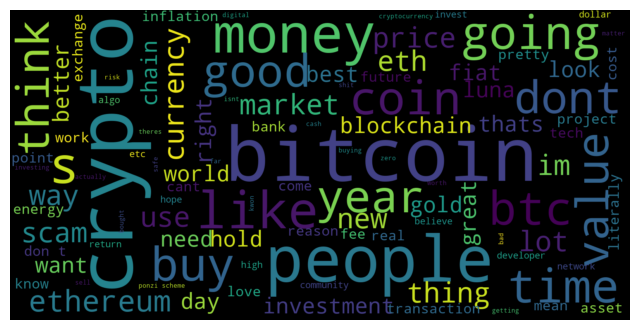

In [114]:
show_wordcloud(data_df['processed_text'], title = '')

#### Samples - Positive Class

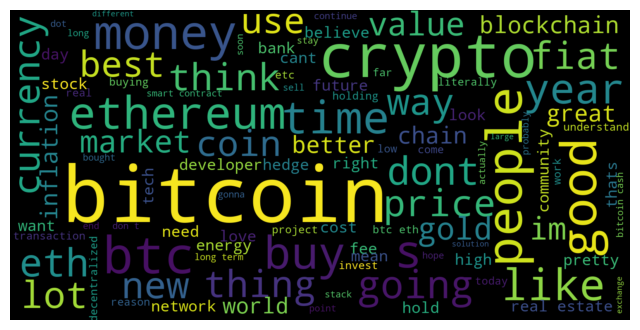

In [115]:
show_wordcloud(data_df[data_df['sentiment'] == 'Positive']['processed_text'], title = '')

#### Samples - Negative Class

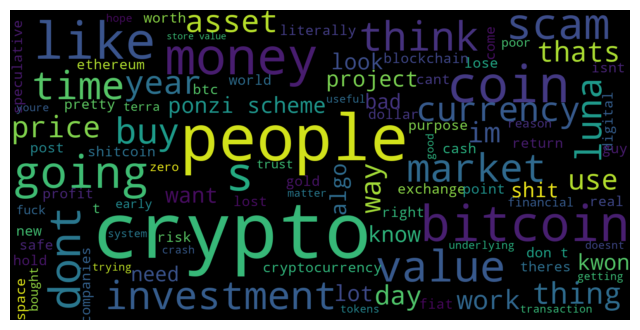

In [116]:
show_wordcloud(data_df[data_df['sentiment'] == 'Negative']['processed_text'], title = '') 

### Saving Data on disk

In [102]:
data_df.columns

Index(['worker_id', 'is_reviewed', 'comment_text', 'sentiment', 'reddit_url',
       'comment_text_len', 'processed_text', 'processed_text_len'],
      dtype='object')

In [106]:
data_df[["worker_id", "sentiment", "processed_text"]].to_csv("../data/processed_dataset.csv", index=False)

In [117]:
data_df['class'] = np.where(data_df['sentiment'] == 'Negative',0, 1)
data_df

,worker_id,is_reviewed,comment_text,sentiment,reddit_url,comment_text_len,processed_text,processed_text_len,class
0,XYNN2Y4VCF3G,False,"I bought 2200 at the ico, at 0.50$ per coin. H...",Positive,https://www.reddit.com/r/Avax/comments/uzggar/...,125,bought 2200 ico 050 coin hold sold 3 months ag...,71,1
1,DR6XNZMT9KRH,False,"Harmony one , algorand , Cardano, solana , vec...",Positive,https://www.reddit.com/r/CryptoCurrency/commen...,135,harmony algorand cardano solana vechain gonna ...,80,1
2,9FCQGMYD4A42,False,"Honestly, after reading this post and many of ...",Negative,https://www.reddit.com/r/CryptoCurrency/commen...,323,honestly reading post responses conclude crypt...,171,0
3,QEZAEMV2WF9D,False,In bear market is where money is made. I Will ...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,86,bear market money continue dca assets believe,45,1
4,Z7J7W3XCP4XC,False,Funny how people think Bitcoin's risk is compa...,Negative,https://www.reddit.com/r/investing/comments/um...,142,funny people think bitcoins risk comparable st...,105,0
...,...,...,...,...,...,...,...,...,...
557,FM9FYY27VTVR,False,Lightning Network has the capability to do mil...,Positive,https://www.reddit.com/r/Bitcoin/comments/uzz7...,101,lightning network capability millions btc tran...,72,1
558,K94W3ATCZX2V,False,It means there will be more daily volume which...,Positive,https://www.reddit.com/r/Bitcoin/comments/v0fs...,132,means daily volume means daily active users me...,80,1
559,W7APN9XYDRV6,False,The exchanges were so irresponsible to list th...,Negative,https://www.reddit.com/r/CryptoCurrency/commen...,92,exchanges irresponsible list tokens luna shoul...,62,0
560,MTCJYTYKKHZJ,False,Massive ecosystem. Pretty much all application...,Positive,https://www.reddit.com/r/CryptoCurrency/commen...,1155,massive ecosystem pretty applications shitload...,693,1


In [118]:
data_df[["class", "sentiment", "comment_text", "processed_text"]].to_csv("../data/processed_dataset_opt.csv", index=False)